In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Dataset
data = fetch_california_housing()
X = data.data
y = data.target


In [3]:
# 2. Pré-processamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 3. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
# 4. Rede Neural Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
# 5. Treino
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0
)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rede Neural — RMSE: 0.530 | MAE: 0.359


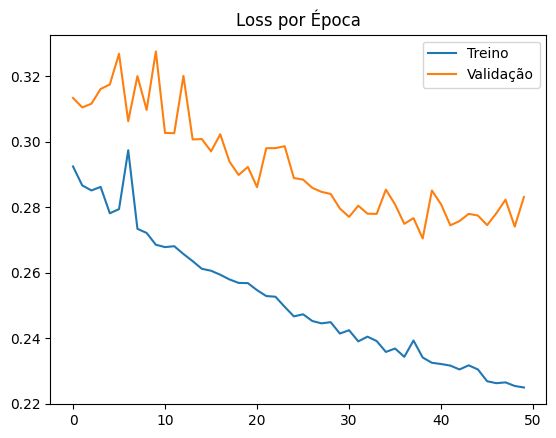

In [10]:
# 6. Avaliação
loss, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = model.predict(X_test).flatten()

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Rede Neural — RMSE: {rmse_nn:.3f} | MAE: {mae:.3f}")

# Curvas de treino
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.legend(); plt.show()

In [11]:
# 7. Comparação com RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"RandomForest — RMSE: {rmse_rf:.3f} | MAE: {mae_rf:.3f}")

RandomForest — RMSE: 0.505 | MAE: 0.328
